In [26]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

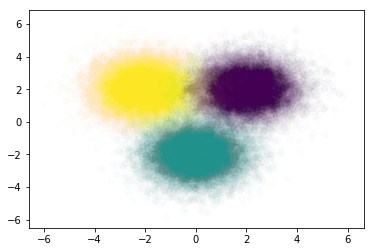

In [27]:
D = 2
K = 3
N = int(K*1.5e4)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.01)

In [28]:
# Functions

def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def ReLU(H):
    return H*(H > 0)

def softmax(H):
    eH = np.exp(H)
    return eH / eH.sum(axis = 1, keepdims = True)

def feed_forward(X, W1, b1, W2, b2):
    Z1 = ReLU(np.matmul(X,W1) + b1)
    P = softmax(np.matmul(Z1,W2) + b2)
    return Z1, P

def cross_entropy(Y,P):
    return -np.sum(Y*np.log(P))

def accuracy(Y,P):
    return np.mean(Y.argmax(axis = 1) == P.argmax(axis = 1))

In [29]:
# Data Prep

Y = one_hot_encode(y)

In [30]:
# Creat Initial Weights

M = 4

W1_0 = np.random.randn(D,M)
b1_0 = np.random.randn(M)
W2_0 = np.random.randn(M,K)
b2_0 = np.random.randn(K)

Accuracy: 0.9681333333333333


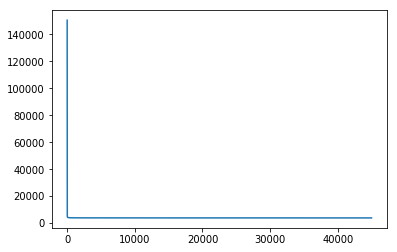

In [31]:
# Train the Model with Full Gradient Descent

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J = []
eta = 1e-5
epochs = int(4.5e4)

t0_full = dt.datetime.now()

for epoch in range(epochs):
    Z1, P = feed_forward(X, W1, b1, W2, b2)
    J.append(cross_entropy(Y,P))
    
    dH2 = P - Y
    dW2 = np.matmul(Z1.T, dH2)
    W2 -= eta*dW2
    b2 -= eta*dH2.sum(axis = 0)
    
    dZ1 = np.matmul(dH2, W2.T)
    dH1 = dZ1*(Z1 > 0)
    dW1 = np.matmul(X.T, dH1)
    W1 -= eta*dW1
    b1 -= eta*dH1.sum(axis = 0)

print("Accuracy: {}".format(accuracy(Y,P)))
plt.plot(J)

t_run_full = (dt.datetime.now() - t0_full).seconds

Accuracy: 0.9608888888888889


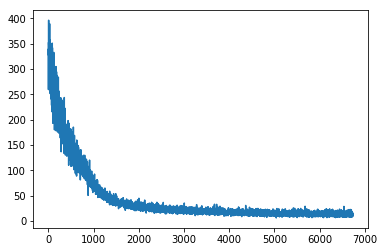

In [32]:
# Train the Model with Stochastic Gradient Descent

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J = []
eta = 1e-5
epochs = 15

t0_batch = dt.datetime.now()

for epoch in range(epochs):
    
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    
    X = X[s]
    Y = Y[s]
    
    for i in range(int(N/100)-1):
        x_i = X[i*100:(i+1)*100,:]
        y_i = Y[i*100:(i+1)*100,:]
        
        z1_i, p_i = feed_forward(x_i, W1, b1, W2, b2)
        J.append(cross_entropy(y_i,p_i))
        
        dH2 = p_i - y_i
        dW2 = np.matmul(z1_i.T, dH2)
        W2 -= eta*dW2
        b2 -= eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(z1_i > 0)
        dW1 = np.matmul(x_i.T, dH1)
        W1 -= eta*dW1
        b1 -= eta*dH1.sum(axis = 0)

P = feed_forward(X, W1, b1, W2, b2)[-1]
print("Accuracy: {}".format(accuracy(Y,P)))
plt.plot(J)

t_run_batch = (dt.datetime.now() - t0_batch).seconds

Accuracy: 0.9609111111111112


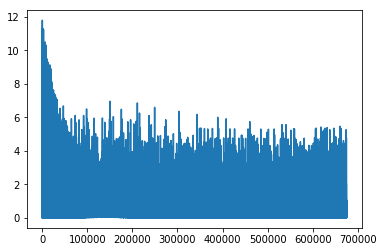

In [34]:
W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J = []

eta = 1e-5

epochs= 15

t0_stoch = dt.datetime.now()

for epoch in range (epochs):
    
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    
    X = X[s]
    Y = Y[s]

    for i in range (N):
        
        X_i = X[[i],:]
        Y_i = Y[[i],:]
    
        Z1_i,P_i= feed_forward(X_i,W1,b1,W2,b2)
    
        J.append(cross_entropy(Y_i,P_i))
    
        dH2 = P_i - Y_i
        dW2 = np.matmul(Z1_i.T, dH2)
        W2 -= eta*dW2
        b2 -= eta*dH2.sum(axis = 0)
    
        dZ1 = np.matmul(dH2,W2.T)
        dH1 = dZ1*(Z1_i>0)
        dW1 = np.matmul(X_i.T,dH1)
        W1 -= eta*dW1
        b1 -= eta*dH1.sum(axis=0)
    
P = feed_forward(X, W1, b1, W2, b2)[-1]
print("Accuracy: {}".format(accuracy(Y,P)))
plt.plot(J)

t_run_Stoch = (dt.datetime.now() - t0_stoch).seconds

Accuracy: 0.9664


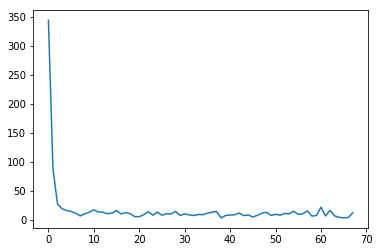

In [37]:
# Train the Model with Stochastic Gradient Descent

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J = []
eta = 1e-5
epochs = 15

mu = 0.9

Vw2 = 0
Vw1 = 0
Vb2 = 0
Vb1 = 0


t0_m2 = dt.datetime.now()

for epoch in range(epochs):
    
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    
    X = X[s]
    Y = Y[s]
    
    for i in range(int(N/100)):
        x_i = X[i*100:(i+1)*100,:]
        y_i = Y[i*100:(i+1)*100,:]
        
        z1_i, p_i = feed_forward(x_i, W1, b1, W2, b2)
        J.append(cross_entropy(y_i,p_i))
        
        dH2 = p_i - y_i
        dW2 = np.matmul(z1_i.T, dH2)
        Vw2 = mu*Vw2 - eta*dW2
        Vb2 = mu*Vb2 -eta*dH2.sum(axis = 0)
        W2 += Vw2
        b2 += Vb2
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(z1_i > 0)
        dW1 = np.matmul(x_i.T, dH1)
        Vw1 = mu*Vw1 - eta*dW1
        Vb1 = mu*Vb1 - eta*dH1.sum(axis = 0)
        W1 += Vw1
        b1 += Vb1

P = feed_forward(X, W1, b1, W2, b2)[-1]
print("Accuracy: {}".format(accuracy(Y,P)))
plt.plot(J[::100])

t_run_m = (dt.datetime.now() - t0_m2).seconds

In [36]:
print("Full Gradient Descent Runtime: {} seconds".format(t_run_full))
print("Stochastic Gradient Descent Runtime: {} seconds".format(t_run_Stoch))
print("Batch Gradient Descent Runtime: {} seconds".format(t_run_batch))
print("Monmentum Gradient Descent Runtime: {} seconds".format(t_run_m))


Full Gradient Descent Runtime: 934 seconds
Stochastic Gradient Descent Runtime: 72 seconds
Batch Gradient Descent Runtime: 1 seconds
Monmentum Gradient Descent Runtime: 1 seconds
